,FIle name,Color model,Format,Channels,Size,Width,Height,Full path,Image
0,"DALL·E 2024-11-09 21.05.16 - A vibrant landscape illustration of a mountain range with snow-capped peaks and a clear blue sky, a lush green meadow with colorful wildflowers in the.png",RGB,WEBP,3,0.44,1024,1024,"C:\Users\Forze\Test\DALL·E 2024-11-09 21.05.16 - A vibrant landscape illustration of a mountain range with snow-capped peaks and a clear blue sky, a lush green meadow with colorful wildflowers in the.png",
1,"DALL·E 2024-11-09 21.05.59 - A detailed illustration of a serene forest scene with tall trees, lush greenery, a small river flowing through, and soft sunlight filtering through th.png",RGB,WEBP,3,0.44,1024,1024,"C:\Users\Forze\Test\DALL·E 2024-11-09 21.05.59 - A detailed illustration of a serene forest scene with tall trees, lush greenery, a small river flowing through, and soft sunlight filtering through th.png",
2,dog(2).png,RGB,JPEG,3,0.01,218,232,C:\Users\Forze\Test\dog(2).png,
3,images (2).jpg,RGB,JPEG,3,0.01,275,183,C:\Users\Forze\Test\images (2).jpg,
4,images (4).jpg,RGB,JPEG,3,0.01,275,183,C:\Users\Forze\Test\images (4).jpg,
5,images (5).jpg,RGB,JPEG,3,0.01,260,194,C:\Users\Forze\Test\images (5).jpg,
6,images (6).jpg,RGB,JPEG,3,0.01,275,183,C:\Users\Forze\Test\images (6).jpg,
7,images (7).png,RGB,JPEG,3,0.00,225,225,C:\Users\Forze\Test\images (7).png,
8,images.jpg,RGB,JPEG,3,0.01,300,168,C:\Users\Forze\Test\images.jpg,
9,smg.jpg,RGB,JPEG,3,0.01,328,154,C:\Users\Forze\Test\smg.jpg,

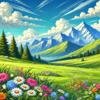
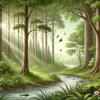
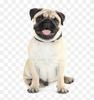
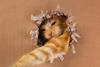
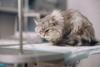
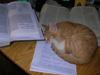
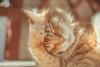
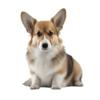
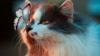
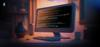
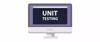
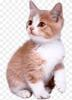
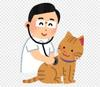
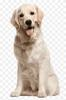
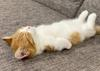

In [11]:
from PIL import Image, ImageOps, ImageFilter
import pandas as pd
import numpy as np
import os
import glob
import random
from IPython.display import HTML
import base64
from io import BytesIO

def image_formatter(img_path):
    if img_path is not None:
        with Image.open(img_path) as img:
            img.thumbnail((100, 100))
            buffered = BytesIO()
            img.save(buffered, format="JPEG")
            b64_string = base64.b64encode(buffered.getvalue()).decode()
            return f'<img src="data:image/jpeg;base64,{b64_string}" width="100"/>'
    return "error"



def get_image_data(folder_path):
    image_data = []
    for filepath in glob.glob(os.path.join(folder_path, '*')):
        try:
            with Image.open(filepath) as img:
                image_info = {
                    'FIle name': os.path.basename(filepath),
                    'Color model': img.mode,
                    'Format': img.format,
                    'Channels': len(img.getbands()),
                    'Size': round(os.path.getsize(filepath) / (1024 * 1024), 2),
                    'Width': img.width,
                    'Height': img.height,
                    'Full path': filepath,
                    'Image': filepath
                }
                image_data.append(image_info)
        except IOError:
            continue
    df = pd.DataFrame(image_data)
    return df



folder_path = "C:\\Users\\Forze\\Test"
image_df = get_image_data(folder_path)

HTML(image_df.to_html(escape=False, formatters={'Image': image_formatter}))



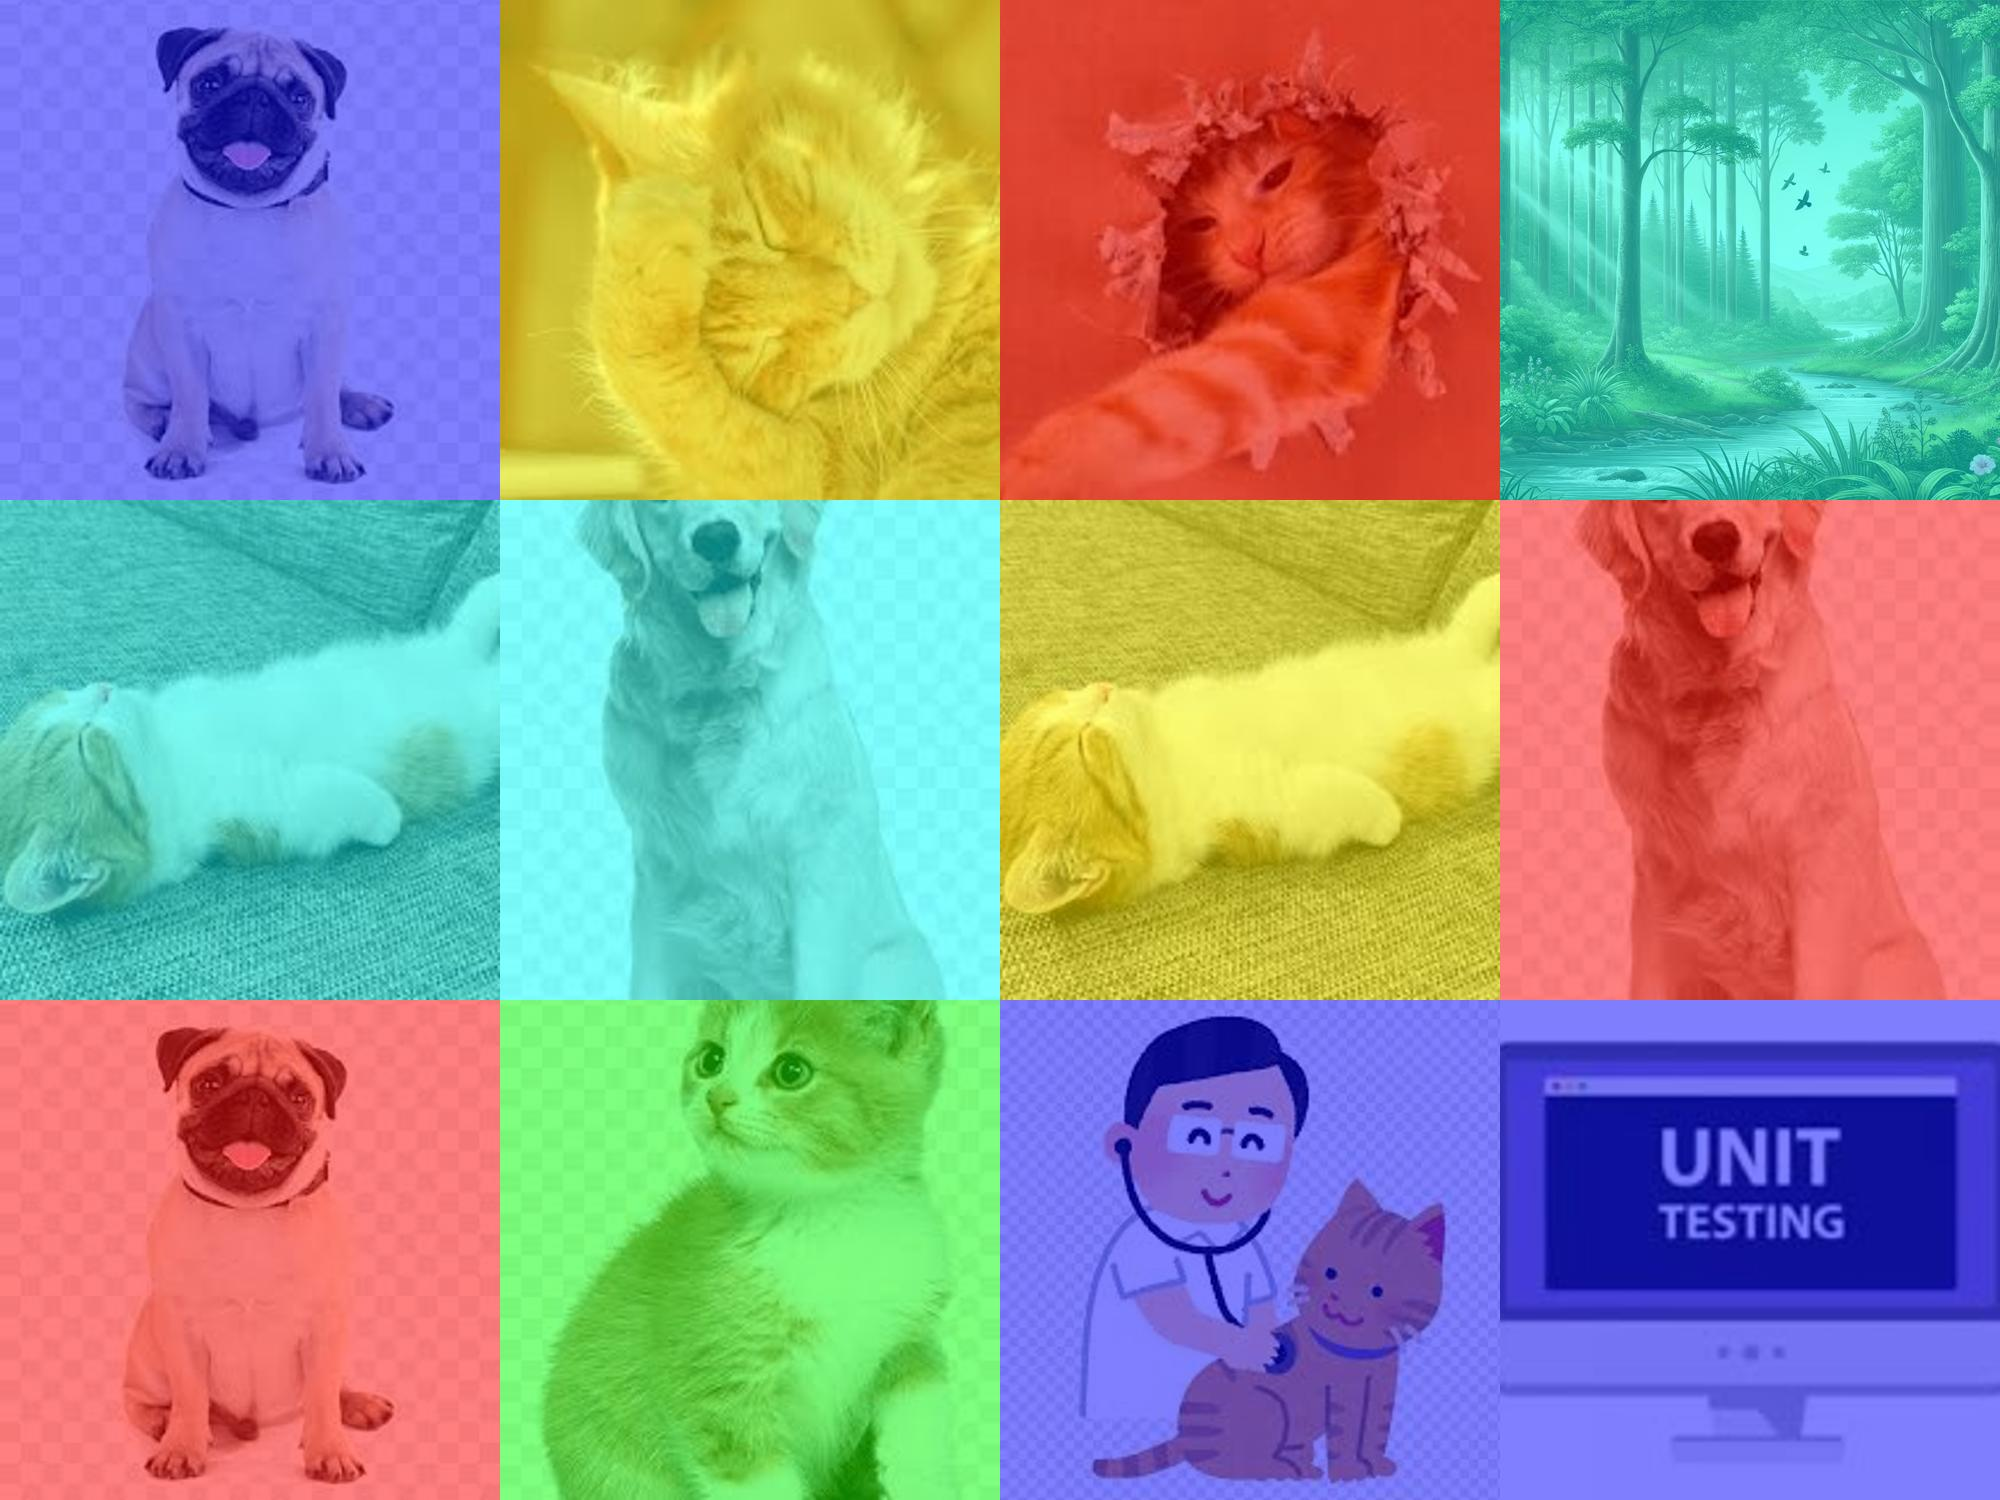

In [12]:
from IPython.display import display, Image as IPImage
from datetime import datetime

def crop_to_square(img):
    min_side = min(img.size)
    left = (img.width - min_side) / 2
    top = (img.height - min_side) / 2
    right = (img.width + min_side) / 2
    bottom = (img.height + min_side) / 2
    return img.crop((left, top, right, bottom))

def create_poster(folder_path, output_name, num_rows, num_cols):
    images = [Image.open(img) for img in glob.glob(os.path.join(folder_path, '*')) if img.endswith(('jpg', 'png', 'jpeg'))]
    if not images:
        print("No images")
        return
    
    random_images = [random.choice(images) for _ in range(num_rows * num_cols)]
    poster_width = num_cols * 500
    poster_height = num_rows * 500
    poster = Image.new('RGB', (poster_width, poster_height))

    for i, img in enumerate(random_images):
        img = crop_to_square(img)
        img = img.resize((500, 500))

        overlay_color = random.choice([(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)])
        overlay = Image.new('RGB', img.size, overlay_color)
        img = Image.blend(img, overlay, 0.5)

        x = (i % num_cols) * 500
        y = (i // num_cols) * 500
        poster.paste(img, (x, y))

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    unique_output_name = f"{output_name}_{timestamp}.jpg"
    poster.save(unique_output_name)
    
    display(IPImage(filename=unique_output_name))

folder_path = "C:\\Users\\Forze\\Test"
output_name = "poster"
create_poster(folder_path, output_name, 3, 4)
